In [1]:
from cw.io import read_cw_data
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# Read and analyse the crowdwater data

In [4]:
cw_data = read_cw_data()
print(f"Total number of cw reading {len(cw_data)}")

Total number of cw reading 34415


/home/esowc31/anand/CW4Floods/cw/io.py:45: DtypeWarning: Columns (2,3,7,11,16,28,36,38,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)


In [6]:
cw_data = cw_data[cw_data.WATER_LEVEL.notna()]
print(f"Total number of cw reading without NA {len(cw_data)}")


Total number of cw reading without NA 7321


In [8]:
cw_data = cw_data[cw_data.WATER_LEVEL != "false" ]
print(f"Total number of cw reading without NA and false {len(cw_data)}")

Total number of cw reading without NA and false 7320


In [10]:
print(f"All the columns in cw_data {cw_data.columns[:]}")

All the columns in cw_data Index(['ID', 'ROOT_ID', 'LATITUDE', 'LONGITUDE', 'CATEGORY', 'IMAGE',
       'FLOW_TYPE', 'SNOW_ICE_PRESENT', 'MOISTURE', 'WATER_LEVEL', 'PP_TYPE',
       'PP_RIVER_STAGNENT', 'PP_STREAM_OBSERVATION_TIME',
       'PP_STREAM_PROPORTIONS', 'PP_SHORE_PLOTSIZE', 'PP_AMOUNT',
       'WL_ADVANCED', 'WL_WIDTH', 'WL_DEPTH', 'STREAMTYPE_TYPE',
       'STREAMTYPE_DRINK_WATER', 'STREAMTYPE_SWIMMING', 'STREAMTYPE_BUILTIN',
       'WL_MATERIAL', 'STREAMTYPE_WATERCOLOR', 'STREAMTYPE_GROUNDVISIBLE',
       'STREAMTYPE_ANIMALS', 'STREAMTYPE_POLLUTION', 'STREAMTYPE_DRIESUP',
       'STREAMTYPE_NAME', 'WL_METHOD', 'WL_FLOW_VELOCITY', 'WL_DISTANCE',
       'WL_TIME_A', 'WL_TIME_B', 'WL_TIME_C', 'WL_DISTANCE_B', 'WL_DISTANCE_C',
       'PP_ADVANCED', 'PP_ADV_PET', 'PP_ADV_POSOFT', 'PP_ADV_POHARD',
       'PP_ADV_PS', 'PP_ADV_PSE', 'PP_ADV_MULTILAYER', 'PP_ADV_OTHER',
       'PP_PLASTIC_REMOVED_CHECK', 'PHYSICAL_SCALE_UNIT',
       'PHYSICAL_SCALE_LEVEL', 'DESCRIPTION', 'SPOTTED_

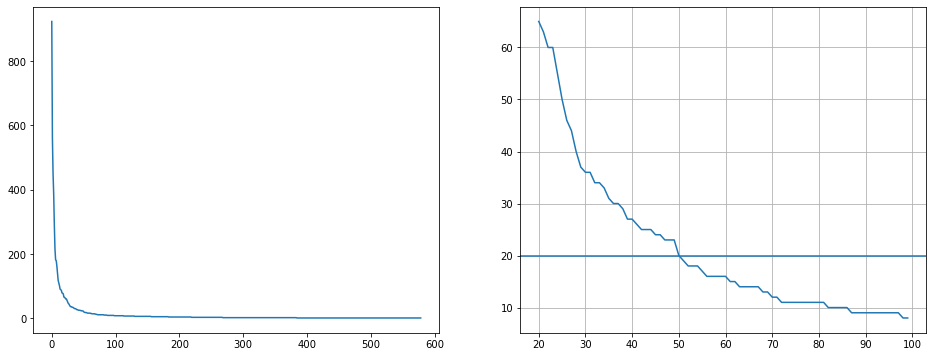

They are atleast 50 stations with 20 or more readings, 
 this includes the stations on entire globe and not only to europe


In [17]:
## Sort stations with highest frequency of the data

reading_frequency = np.unique(cw_data.ROOT_ID, return_counts = True)
sorted_freq = sorted(zip(reading_frequency[1], reading_frequency[0]), reverse=True)
tuples = zip(*sorted_freq)
freq, station_id = [ list(tuple) for tuple in tuples]

# Frequency distribution for 50 stations with highest number of readings
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))
ax1.plot(freq)
ax2.plot(np.arange(20, 100), freq[20:100])
ax2.axhline(20)
plt.grid()
plt.show()

print("They are atleast 50 stations with 20 or more readings, \n this includes the stations on entire globe and not only to europe")

Most of the values are in the range -1 to +1


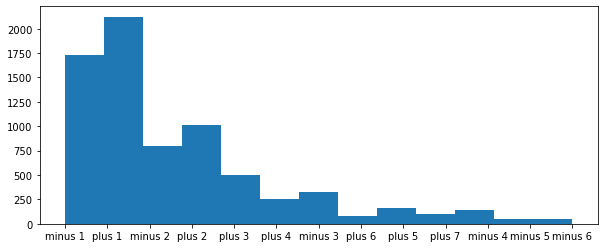

In [18]:
# Lets see how are the values distributed
fig, ax = plt.subplots(1,1, figsize = (10, 4))
plt.hist(cw_data.WATER_LEVEL, bins = 13)

print(f"Most of the values are in the range -1 to +1")